## Menyiapkan Library yang digunakan

<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Menyiapkan dan melihat data

In [22]:
df = pd.read_excel('https://raw.githubusercontent.com/alfianpr/perhitungan-volume-objek-simetri/main/beras_clean.xlsx', usecols=['pixel', 'volume', 'jarak'])
print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
     volume  jarak   pixel
0  0.000040  0.305  202394
1  0.000020  0.305  131027
2  0.000025  0.305  130709
3  0.000050  0.305  233374
4  0.000020  0.305  124836
Jumlah kolom dan baris dari data : (100, 3)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  100 non-null    float64
 1   jarak   100 non-null    float64
 2   pixel   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
data statistik :
           volume       jarak          pixel
count  100.000000  100.000000     100.000000
mean     0.000037    0.326100  152638.610000
std      0.000010    0.013908   28966.757711
min      0.000020    0.305000   85198.000000
25%      0.000030    0.315000  133340.750000
50%      0.000035    0.322000  150710.000000
75%      0.000045    0.330000  174197.750000
max      0.000065    0.350000  233374.00

## Cek missing value

In [23]:
#Mencari dan menangani missing values
df.isnull().sum()

volume    0
jarak     0
pixel     0
dtype: int64

## Exploratory Data Analysis

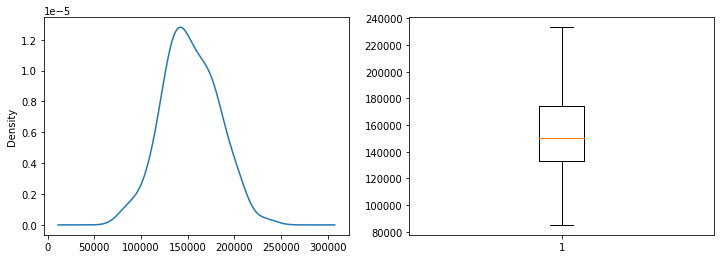

In [24]:
#Univariate analysis pixel

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['pixel'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['pixel'])

plt.show()

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


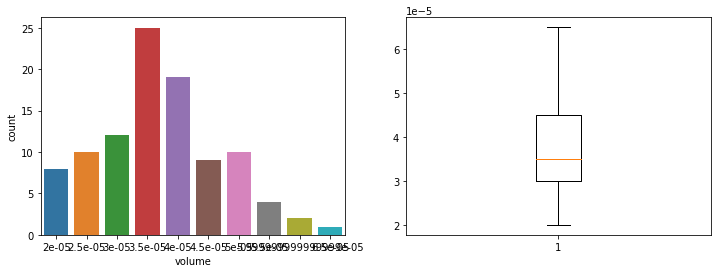

In [25]:
#Univariate analysis volume.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['volume'])

f.add_subplot(1,2,2)
plt.boxplot(df['volume'])

plt.show()

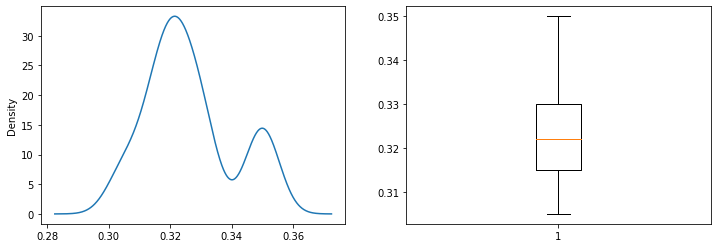

In [26]:
#Univariate analysis jarak

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['jarak'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['jarak'])

plt.show()

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

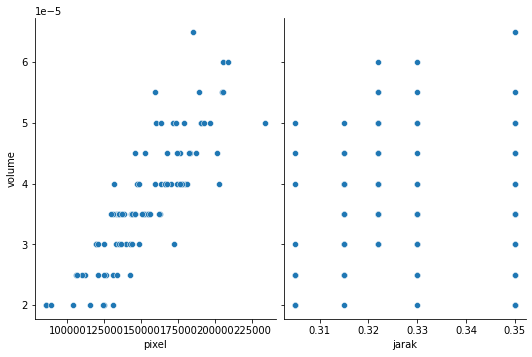

In [27]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['pixel', 'jarak'], y_vars=['volume'], size=5, aspect=0.75)

In [28]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

C:\Users\acer\AppData\Local\Temp/ipykernel_21608/1563951346.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,volume,jarak,pixel
volume,1.00,0.09,0.84
jarak,0.09,1.00,-0.38
pixel,0.84,-0.38,1.00


## Modelling dan melihat akurasi prediksi

In [29]:
#variabel x dan y.
x = df.drop(columns='volume')
y = df['volume']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train.values, y_train.values)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[3.73853457e-04 3.53476323e-10]
-0.00013870818466378294


## Uji akurasi machine learning
Didapat akurasi sebesar 91%

In [30]:
#Accuracy score dengan data test
lin_reg.score(x_test.values, y_test.values)

0.8926457979481357

## Memprediksi volume

In [31]:
lin_reg.predict([[50000, 30]])

array([18.69253417])